In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np

C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

In [3]:
# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [4]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [6]:
def build_model(activation="relu", optimizer="adam"):
    model = keras.Sequential([
        keras.layers.Dense(64, activation=activation, input_shape=X_train.shape[1:]),
        keras.layers.Dense(32, activation=activation),
        keras.layers.Dense(1, activation="linear")  # regression output
    ])
    
    model.compile(
        optimizer=optimizer,
        loss="mse",   # common loss for regression
        metrics=["mae"]  # mean absolute error as additional metric
    )
    return model

In [7]:
# Train with ReLU + Adam
model_relu_adam = build_model(activation="relu", optimizer="adam")
history_relu_adam = model_relu_adam.fit(
    X_train, y_train, epochs=10, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)


C:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8928 - mae: 0.6414 - val_loss: 0.4570 - val_mae: 0.4797
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4102 - mae: 0.4559 - val_loss: 0.4132 - val_mae: 0.4441
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3788 - mae: 0.4363 - val_loss: 0.3946 - val_mae: 0.4413
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3930 - mae: 0.4298 - val_loss: 0.3779 - val_mae: 0.4334
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3482 - mae: 0.4164 - val_loss: 0.3533 - val_mae: 0.4170
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3354 - mae: 0.4073 - val_loss: 0.3513 - val_mae: 0.4122
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3478 - mae: 0.4057 - val_loss: 0.3419 - val_mae: 0.4199
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3450 - mae: 0.3967 - val_loss: 0.3296 - val_mae: 0.3952
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - lo

In [8]:
# Train with Tanh + SGD
model_tanh_sgd = build_model(activation="tanh", optimizer="sgd")
history_tanh_sgd = model_tanh_sgd.fit(
    X_train, y_train, epochs=10, batch_size=32,
    validation_data=(X_val, y_val), verbose=1
)


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6033 - mae: 0.5594 - val_loss: 0.4930 - val_mae: 0.5112
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4686 - mae: 0.5009 - val_loss: 0.4795 - val_mae: 0.5027
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4509 - mae: 0.4891 - val_loss: 0.4585 - val_mae: 0.4907
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4368 - mae: 0.4777 - val_loss: 0.4538 - val_mae: 0.4829
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4241 - mae: 0.4692 - val_loss: 0.4330 - val_mae: 0.4767
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4145 - mae: 0.4606 - val_loss: 0.4240 - val_mae: 0.4656
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4062 - mae: 0.4543 - val_loss: 0.4151 - val_mae: 0.4589
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4001 - mae: 0.4500 - val_loss: 0.4117 - val_mae: 0.4587
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - lo

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Val MSE": mean_squared_error(y_val, y_val_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Val MAE": mean_absolute_error(y_val, y_val_pred),
        "Train RMSE": math.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Val RMSE": math.sqrt(mean_squared_error(y_val, y_val_pred))
    }
    return metrics

metrics_relu_adam = evaluate_model(model_relu_adam, X_train, y_train, X_val, y_val)
metrics_tanh_sgd = evaluate_model(model_tanh_sgd, X_train, y_train, X_val, y_val)



516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [10]:
def print_report(name, metrics):
    print(f"\n===== {name} =====")
    print(f"Train MSE : {metrics['Train MSE']:.4f}")
    print(f"Val   MSE : {metrics['Val MSE']:.4f}")
    print(f"Train MAE : {metrics['Train MAE']:.4f}")
    print(f"Val   MAE : {metrics['Val MAE']:.4f}")
    print(f"Train RMSE: {metrics['Train RMSE']:.4f}")
    print(f"Val   RMSE: {metrics['Val RMSE']:.4f}")

In [11]:
# Evaluate models
metrics_relu_adam = evaluate_model(model_relu_adam, X_train, y_train, X_val, y_val)
metrics_tanh_sgd = evaluate_model(model_tanh_sgd, X_train, y_train, X_val, y_val)

# Print reports separately
print_report("ReLU + Adam", metrics_relu_adam)
print_report("Tanh + SGD", metrics_tanh_sgd)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

===== ReLU + Adam =====
Train MSE : 0.3634
Val   MSE : 0.3264
Train MAE : 0.3904
Val   MAE : 0.3977
Train RMSE: 0.6029
Val   RMSE: 0.5713

===== Tanh + SGD =====
Train MSE : 0.3792
Val   MSE : 0.3955
Train MAE : 0.4372
Val   MAE : 0.4440
Train RMSE: 0.6158
Val   RMSE: 0.6289


1. What changes if I use ReLU vs Tanh activations in hidden layers?

ReLU: Faster training, less chance of vanishing gradients, better for deep networks. But can cause "dead neurons".

Tanh: Squashes outputs between -1 and 1, which may help if features are centered. Slower convergence, possible vanishing gradients.

2. Why should the output layer use a linear activation instead of sigmoid?

Regression target (house price) can take any real value, not restricted to 
[0,1] or [−1,1].

A linear activation allows unrestricted predictions.

If we used sigmoid, outputs would be bounded, which makes sense for classification probabilities but not prices.

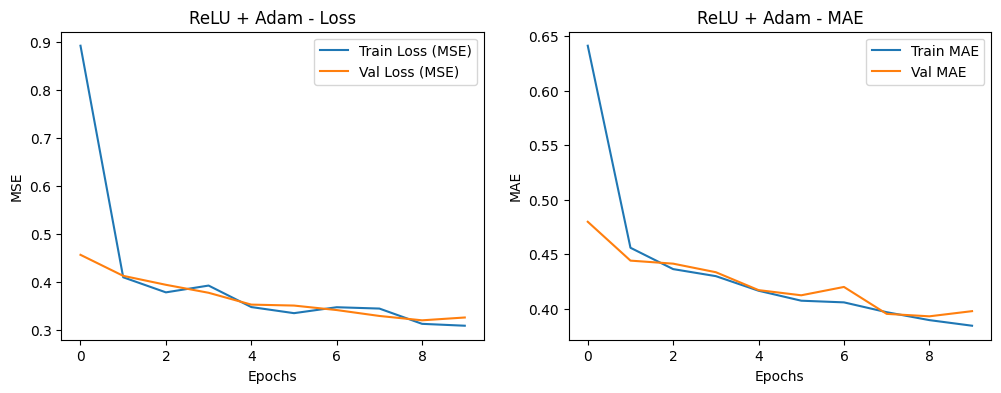

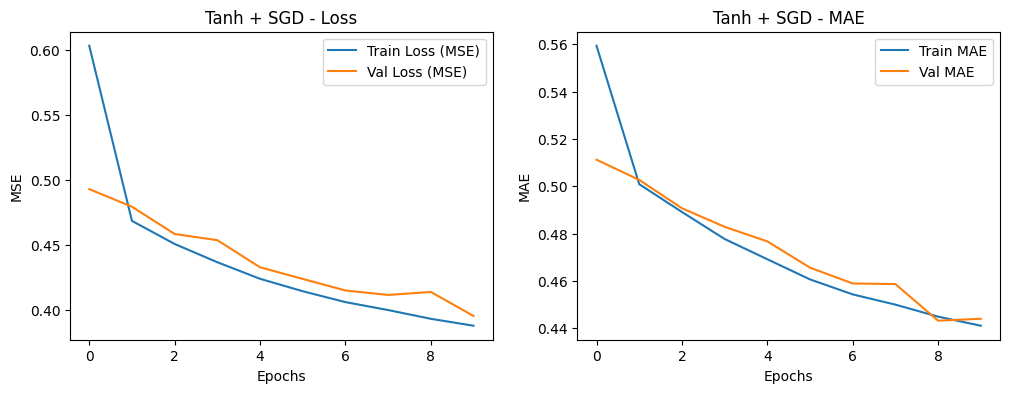

In [13]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Plot Loss (MSE)
    plt.figure(figsize=(12, 4))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss (MSE)")
    plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"{title} - Loss")
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Train MAE")
    plt.plot(history.history["val_mae"], label="Val MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title(f"{title} - MAE")
    plt.legend()
    
    plt.show()

plot_history(history_relu_adam, "ReLU + Adam")
plot_history(history_tanh_sgd, "Tanh + SGD")
